In [1]:
import numpy as np
import pandas as pd


pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [2]:
df = pd.read_csv("data/data_merge.csv")

In [3]:
num_columns = [col for col in df.columns if df[col].dtype != "object"]
cat_columns = [col for col in df.columns if df[col].dtype == "object"]

In [4]:
df[num_columns] = df[num_columns] +1

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  StandardScaler,OneHotEncoder,FunctionTransformer
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

std = StandardScaler(with_mean=False)
ohe= OneHotEncoder(handle_unknown="ignore")

log_1p = FunctionTransformer(func=np.log1p)
preprocessor_pca = ColumnTransformer(
    transformers=[
        ("ohe",ohe,cat_columns),
        ("log",log_1p,num_columns)
    ]
    
)
pca=Pipeline([
     ('preprocessor', preprocessor_pca),
     ('std', std ),
     ("tsne", TruncatedSVD(n_components=2))
])

pca_value = pca.fit_transform(df)

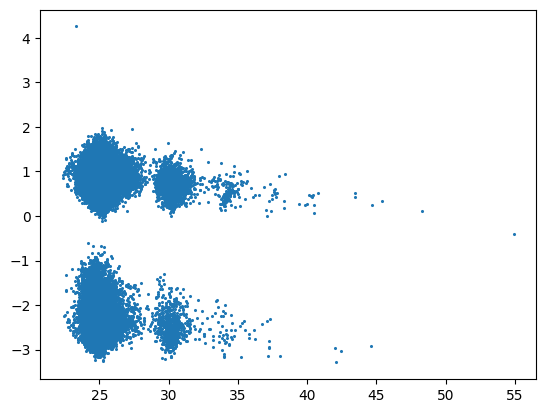

In [6]:
import matplotlib.pyplot as plt

plt.scatter(pca_value[:,0],pca_value[:,1],marker=".",s=6)
plt.show()

In [7]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,20,1)
for k in K:
    print(k)
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=42,verbose=2)
    kmeans.fit(pca_value)
    distortions.append(kmeans.inertia_)

1
Initialization complete
Iteration 0, inertia 2445346.2558224318.
Iteration 1, inertia 302021.321423029.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 319247.78339966084.
Iteration 1, inertia 302021.32142302906.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 379645.6193301658.
Iteration 1, inertia 302021.32142302894.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 313729.5763995256.
Iteration 1, inertia 302021.321423029.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 519686.7188854961.
Iteration 1, inertia 302021.321423029.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 754735.7918695696.
Iteration 1, inertia 302021.32142302906.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 419403.5769693269.
Iteration 1, inertia 302021.3214

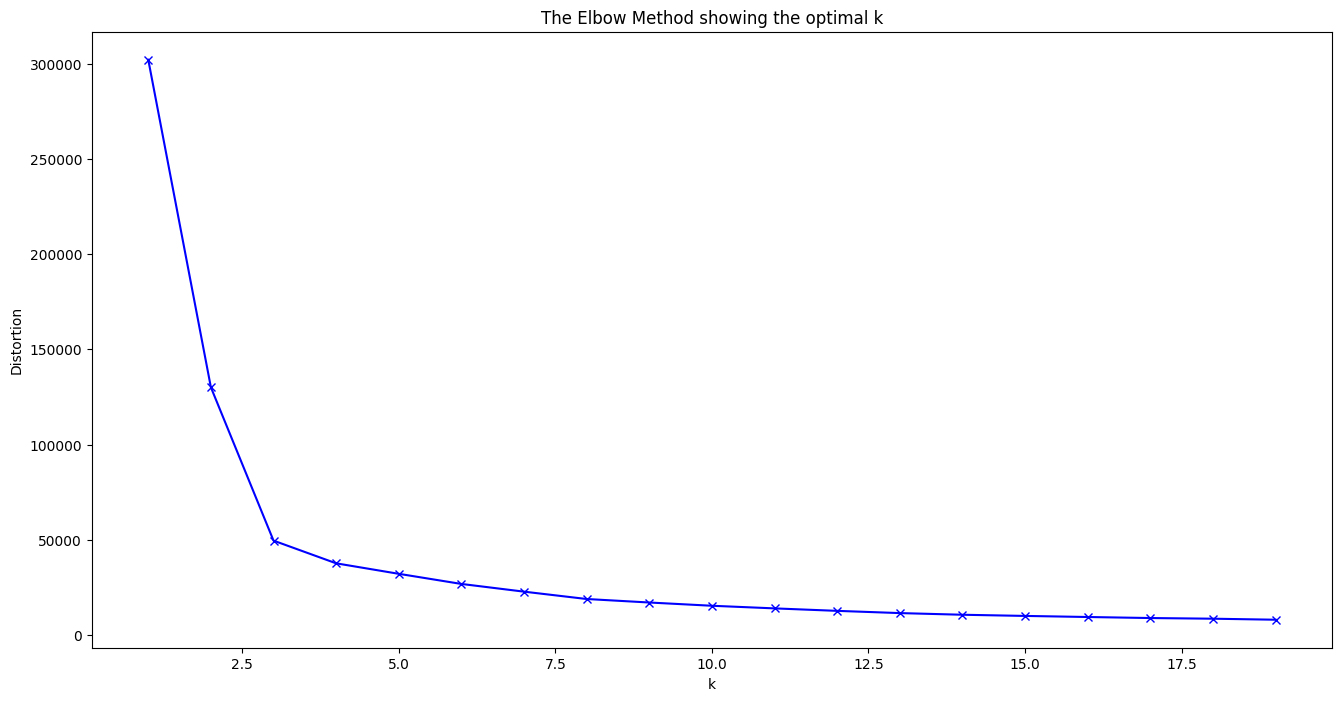

In [8]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [53]:
kmeans = KMeans(n_clusters=8,init="random",n_init=1000,random_state=42,verbose=2)
kmeans.fit(pca_value)

Initialization complete
Iteration 0, inertia 52102.360896916.
Iteration 1, inertia 28000.206702732397.
Iteration 2, inertia 27386.415777500162.
Iteration 3, inertia 27062.695572285968.
Iteration 4, inertia 26890.045128349044.
Iteration 5, inertia 26798.429160386288.
Iteration 6, inertia 26742.262991785443.
Iteration 7, inertia 26707.263165224096.
Iteration 8, inertia 26681.053466170102.
Iteration 9, inertia 26658.30612411542.
Iteration 10, inertia 26636.63731314854.
Iteration 11, inertia 26614.95485931868.
Iteration 12, inertia 26593.139376380834.
Iteration 13, inertia 26571.57712867824.
Iteration 14, inertia 26550.476618851633.
Iteration 15, inertia 26530.092649430724.
Iteration 16, inertia 26510.495424409623.
Iteration 17, inertia 26492.111766347276.
Iteration 18, inertia 26475.06224134367.
Iteration 19, inertia 26460.360998603064.
Iteration 20, inertia 26447.531845157933.
Iteration 21, inertia 26436.317824322097.
Iteration 22, inertia 26427.15799872997.
Iteration 23, inertia 26420.4

KMeans(init='random', n_init=1000, random_state=42, verbose=2)

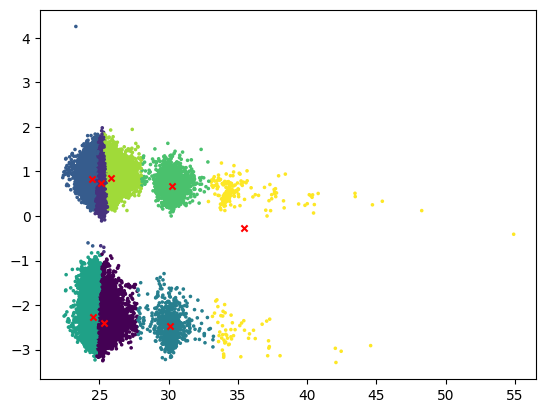

In [54]:
plt.scatter(pca_value[:,0],pca_value[:,1],c=kmeans.labels_,marker=".",s=10)
for center in kmeans.cluster_centers_:
    plt.scatter(center[0],center[1],marker='x',c="r",s=20)

In [55]:
df["label"]=kmeans.labels_

In [56]:
df

,nb_items_total,montant_total,nb_commande,most_frequent_payment_type,customer_state,most_frequent_product_category,mean_review_score,mean_length_comment_title,mean_length_comment_message,recence,label
0,2.0,142.90,2,credit_card,SP,mobilier_electromenager,6.0,16.0,112.0,166.0,1
1,2.0,28.19,2,credit_card,SP,beaute,5.0,1.0,1.0,169.0,2
2,2.0,87.22,2,credit_card,SC,papeterie,4.0,1.0,1.0,592.0,1
3,2.0,44.62,2,credit_card,PA,informatique,5.0,1.0,13.0,376.0,1
4,2.0,197.89,2,credit_card,SP,informatique,6.0,1.0,1.0,343.0,1
...,...,...,...,...,...,...,...,...,...,...,...
93099,3.0,2068.42,2,credit_card,PE,beaute,6.0,1.0,1.0,502.0,6
93100,2.0,85.58,2,credit_card,BA,enfant,5.0,1.0,1.0,317.0,1
93101,2.0,113.46,2,credit_card,MT,auto,6.0,1.0,1.0,623.0,6
93102,2.0,134.69,2,credit_card,ES,informatique,6.0,9.0,134.0,174.0,1


In [57]:
df[df["label"]==0].describe()

,nb_items_total,montant_total,nb_commande,mean_review_score,mean_length_comment_title,mean_length_comment_message,recence,label
count,11562.000000,11562.000000,11562.0,11562.000000,11562.000000,11562.000000,11562.000000,11562.0
mean,2.249611,183.236017,2.0,5.458052,1.575765,28.206798,388.710085,0.0
std,0.653126,252.061546,0.0,0.991014,2.913630,45.765494,132.707654,0.0
min,2.000000,17.620000,2.0,0.000000,1.000000,1.000000,57.000000,0.0
25%,2.000000,73.430000,2.0,5.000000,1.000000,1.000000,291.000000,0.0
50%,2.000000,121.270000,2.0,6.000000,1.000000,1.000000,387.000000,0.0
75%,2.000000,196.000000,2.0,6.000000,1.000000,43.000000,494.000000,0.0
max,8.000000,7275.880000,2.0,6.000000,26.000000,205.000000,656.000000,0.0


In [58]:
df[df["label"]==0]["most_frequent_product_category"].mode()

0    informatique
Name: most_frequent_product_category, dtype: object

In [59]:
df[df["label"]==1].describe()

,nb_items_total,montant_total,nb_commande,mean_review_score,mean_length_comment_title,mean_length_comment_message,recence,label
count,34917.000000,34917.000000,34917.0,34917.000000,34917.000000,34917.000000,34917.000000,34917.0
mean,2.041412,138.386224,2.0,5.353868,2.065699,25.135292,315.569952,1.0
std,0.206029,143.276090,0.0,1.066680,3.809403,43.894569,127.405171,0.0
min,2.000000,11.070000,2.0,0.000000,1.000000,1.000000,55.000000,1.0
25%,2.000000,65.110000,2.0,5.000000,1.000000,1.000000,218.000000,1.0
50%,2.000000,103.640000,2.0,6.000000,1.000000,1.000000,304.000000,1.0
75%,2.000000,163.650000,2.0,6.000000,1.000000,35.000000,401.000000,1.0
max,5.000000,3352.350000,2.0,6.000000,26.000000,205.000000,656.000000,1.0


In [60]:
df[df["label"]==1]["most_frequent_product_category"].mode()

0    informatique
Name: most_frequent_product_category, dtype: object

In [61]:
df[df["label"]==2].describe()

,nb_items_total,montant_total,nb_commande,mean_review_score,mean_length_comment_title,mean_length_comment_message,recence,label
count,19273.000000,19273.000000,19273.0,19273.000000,19273.000000,19273.000000,19273.000000,19273.0
mean,2.008146,102.469863,2.0,4.485861,3.349764,28.542676,162.552535,2.0
std,0.092170,92.492645,0.0,1.710472,5.479088,50.160685,92.884601,0.0
min,2.000000,11.890000,2.0,0.000000,1.000000,1.000000,55.000000,2.0
25%,2.000000,48.290000,2.0,3.000000,1.000000,1.000000,89.000000,2.0
50%,2.000000,76.680000,2.0,5.000000,1.000000,1.000000,137.000000,2.0
75%,2.000000,128.430000,2.0,6.000000,1.000000,38.000000,214.000000,2.0
max,4.000000,2648.760000,2.0,6.000000,26.000000,209.000000,649.000000,2.0


In [62]:
df[df["label"]==2]["most_frequent_product_category"].mode()

0    informatique
Name: most_frequent_product_category, dtype: object

In [63]:
test

NameError: name 'test' is not defined

In [ ]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=2, min_samples=10,n_jobs=-1).fit(pca_value)
clustering.labels_

In [ ]:
np.unique(clustering.labels_)

In [ ]:
plt.scatter(pca_value[:,0],pca_value[:,1],c=clustering.labels_,marker=".",s=5)
plt.show()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', scaler, num_columns)
    ]
)

In [ ]:
test

In [ ]:
from kmodes.kprototypes import KPrototypes
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]

model_Kproto = KPrototypes(n_clusters=4, init="Cao", verbose=2, n_jobs=-1, n_init=8, random_state=42)
df_std = df
df_std[num_columns] = preprocessor.fit_transform(df[num_columns])
model_Kproto.fit_predict(df_std, categorical = catColumnsPos)

In [ ]:
centroides = pca.transform(pd.DataFrame(model_Kproto.cluster_centroids_,columns=df[num_columns+cat_columns].columns))
plt.scatter(pca_value[:,0],pca_value[:,1],c=model_Kproto.labels_,marker=".",s=10)
for center in centroides:
    plt.scatter(center[0],center[1],marker='x',c='r',s=20)